# Phase 2_Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from xgboost import XGBClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pretty_confusion_matrix import pp_matrix
from pretty_confusion_matrix import pp_matrix_from_data
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('output1.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_weapon_Grenades,ct_weapon_Rifels,ct_weapon_Pistols,ct_weapon_Heavy,ct_weapon_SMGs,ct_weapon_Grenades,tarm_heal,ctarm_heal,tscmoney,ctscmoney
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,5.0,0.0,0.0,0.0,500.0,500.0,4000.0,4000.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,2.0,0.0,5.0,0.0,0.0,0.0,800.0,900.0,650.0,600.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,2.0,0.0,4.0,0.0,0.0,0.0,600.0,685.0,500.0,750.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,4.0,0.0,0.0,0.0,600.0,685.0,500.0,750.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,5.0,0.0,0.0,0.0,500.0,692.0,10750.0,18351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,3.0,1.0,2.0,0.0,1.0,2.0,601.0,395.0,5964.0,111.0
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,5.0,0.0,0.0,2.0,675.0,595.0,23915.0,11511.0
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,14.0,1.0,4.0,0.0,1.0,10.0,975.0,995.0,6715.0,1211.0
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,12.0,1.0,4.0,0.0,1.0,3.0,975.0,995.0,6715.0,1211.0


In [3]:
maindf = pd.read_csv('maindata.csv')
maindf

,Unnamed: 0,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,round_winner,ct_score_weapon,t_score_weapon
0,0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,CT,175.0,150.0
1,1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,CT,175.0,170.0
2,2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,CT,140.0,140.0
3,3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,CT,140.0,125.0
4,4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,CT,175.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,T,139.0,356.0
122406,122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,T,218.0,295.0
122407,122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0,T,484.0,638.0
122408,122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0,T,414.0,608.0


In [4]:
minimax = pd.read_csv('minmax.csv')
minimax["map"]=maindf["map"]
maindf=minimax

In [5]:
df_weapons = pd.read_csv('weapons_minmax.csv')

In [6]:
liss = [maindf,df_weapons]
maindf = pd.concat(liss,axis=1)

In [7]:
maindf.drop('minmax_ct_score_weapon',axis=1, inplace= True)
maindf.drop('minmax_t_score_weapon',axis=1, inplace= True)
maindf.drop("Unnamed: 0",axis=1, inplace=True)

In [8]:
mapdummy=pd.get_dummies(maindf["map"])
liss=[maindf,mapdummy]
maindf=pd.concat(liss,axis=1)
maindf.drop("map",axis=1,inplace=True)
maindf

,minmax_time_left,minmax_ct_score,minmax_t_score,minmax_ct_health,minmax_t_health,minmax_ct_armor,minmax_t_armor,minmax_ct_money,minmax_t_money,minmax_ct_helmets,...,minmax_ct_weapon_SMGs,minmax_ct_weapon_Grenades,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo
0,1.000000,0.00000,0.000000,1.000,0.833333,0.000,0.000,0.050000,0.050000,0.0,...,0.000000,0.00,0,1,0,0,0,0,0,0
1,0.891594,0.00000,0.000000,1.000,0.833333,0.800,0.600,0.007500,0.008125,0.0,...,0.000000,0.00,0,1,0,0,0,0,0,0
2,0.548717,0.00000,0.000000,0.782,0.666667,0.588,0.400,0.009375,0.006250,0.0,...,0.000000,0.00,0,1,0,0,0,0,0,0
3,0.434425,0.00000,0.000000,0.782,0.666667,0.588,0.400,0.009375,0.006250,0.0,...,0.000000,0.00,0,1,0,0,0,0,0,0
4,0.999829,0.03125,0.000000,1.000,0.833333,0.384,0.000,0.229375,0.134375,0.0,...,0.000000,0.00,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,0.088005,0.34375,0.424242,0.400,0.403333,0.390,0.718,0.001250,0.074375,0.4,...,0.166667,0.10,0,0,0,0,0,0,1,0
122406,0.999600,0.34375,0.454545,1.000,0.833333,0.190,0.350,0.143750,0.298750,0.2,...,0.000000,0.10,0,0,0,0,0,0,1,0
122407,0.656723,0.34375,0.454545,1.000,0.833333,0.990,0.950,0.015000,0.083750,0.6,...,0.166667,0.50,0,0,0,0,0,0,1,0
122408,0.542431,0.34375,0.454545,1.000,0.833333,0.990,0.950,0.015000,0.083750,0.6,...,0.166667,0.15,0,0,0,0,0,0,1,0


In [9]:
maindf = maindf.join(df['round_winner'].replace({'T' : 0, 'CT' : 1}))
maindf.dtypes

minmax_time_left             float64
minmax_ct_score              float64
minmax_t_score               float64
minmax_ct_health             float64
minmax_t_health              float64
minmax_ct_armor              float64
minmax_t_armor               float64
minmax_ct_money              float64
minmax_t_money               float64
minmax_ct_helmets            float64
minmax_t_helmets             float64
minmax_ct_defuse_kits        float64
minmax_ct_players_alive      float64
minmax_t_players_alive       float64
minmax_t_weapon_Rifels       float64
minmax_t_weapon_Pistols      float64
minmax_t_weapon_Heavy        float64
minmax_t_weapon_SMGs         float64
minmax_t_weapon_Grenades     float64
minmax_ct_weapon_Rifels      float64
minmax_ct_weapon_Pistols     float64
minmax_ct_weapon_Heavy       float64
minmax_ct_weapon_SMGs        float64
minmax_ct_weapon_Grenades    float64
de_cache                       uint8
de_dust2                       uint8
de_inferno                     uint8
d

In [10]:
maindf

,minmax_time_left,minmax_ct_score,minmax_t_score,minmax_ct_health,minmax_t_health,minmax_ct_armor,minmax_t_armor,minmax_ct_money,minmax_t_money,minmax_ct_helmets,...,minmax_ct_weapon_Grenades,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,round_winner
0,1.000000,0.00000,0.000000,1.000,0.833333,0.000,0.000,0.050000,0.050000,0.0,...,0.00,0,1,0,0,0,0,0,0,1
1,0.891594,0.00000,0.000000,1.000,0.833333,0.800,0.600,0.007500,0.008125,0.0,...,0.00,0,1,0,0,0,0,0,0,1
2,0.548717,0.00000,0.000000,0.782,0.666667,0.588,0.400,0.009375,0.006250,0.0,...,0.00,0,1,0,0,0,0,0,0,1
3,0.434425,0.00000,0.000000,0.782,0.666667,0.588,0.400,0.009375,0.006250,0.0,...,0.00,0,1,0,0,0,0,0,0,1
4,0.999829,0.03125,0.000000,1.000,0.833333,0.384,0.000,0.229375,0.134375,0.0,...,0.00,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,0.088005,0.34375,0.424242,0.400,0.403333,0.390,0.718,0.001250,0.074375,0.4,...,0.10,0,0,0,0,0,0,1,0,0
122406,0.999600,0.34375,0.454545,1.000,0.833333,0.190,0.350,0.143750,0.298750,0.2,...,0.10,0,0,0,0,0,0,1,0,0
122407,0.656723,0.34375,0.454545,1.000,0.833333,0.990,0.950,0.015000,0.083750,0.6,...,0.50,0,0,0,0,0,0,1,0,0
122408,0.542431,0.34375,0.454545,1.000,0.833333,0.990,0.950,0.015000,0.083750,0.6,...,0.15,0,0,0,0,0,0,1,0,0


# Cross Validation

In [11]:
X = maindf.loc[:, maindf.columns != 'round_winner']
y = maindf['round_winner']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [13]:
X_train.shape, y_train.shape

((97928, 32), (97928,))

In [14]:
X_test.shape, y_test.shape

((24482, 32), (24482,))

In [15]:
maindf.isnull().values.any()

False

# Balance

In [16]:
y.value_counts()

0    62406
1    60004
Name: round_winner, dtype: int64

<BarContainer object of 2 artists>

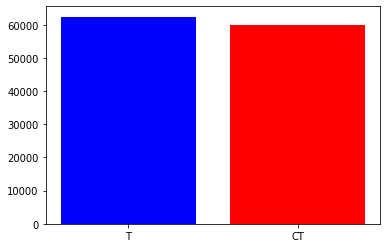

In [17]:
x=["T","CT"]
plt.bar(x,height=y.value_counts(),color=['blue', 'red'])

In [18]:
def model_function(_name):
    print(_name)
    model = _name
    model.fit(X_train , y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
    print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))
    print()    
    confusion_matrix = pd.crosstab(y_test,y_pred_test.round(), rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)
    all_t = confusion_matrix[0][0]+confusion_matrix[1][0]
    all_ct = confusion_matrix[0][1]+confusion_matrix[1][1]
    tpt = confusion_matrix[0][0] / all_t
    tpct = confusion_matrix[1][1] / all_ct
    print()
    cr = classification_report(y_test,y_pred_test.round())
    print(cr)
    print()
    pp_matrix_from_data(y_test, y_pred_test.round(),cmap="Purples_r",columns=["T","CT"])
    print('\n\n\n')
    precision, recall, fscore, support = score(y_test, y_pred_test.round())
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    print('TPT: {}'.format(tpt)) #True Predicted T
    print('TPCT: {}'.format(tpct)) #True Predicted CT
    print('\n\n')
    
    mae = mean_absolute_error(y_test, y_pred_test.round())
    mse = mean_squared_error(y_test, y_pred_test.round())
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test.round())
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

# Base Line

In [19]:
Base_model = DummyRegressor(strategy="mean")
Base_model.fit(X_train , y_train)
y_pred_train = Base_model.predict(X_train)
y_pred_test = Base_model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))
confusion_matrix = pd.crosstab(y_test,y_pred_test.round(), rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

accuracy on train 0.5092414835389265
accuracy on test 0.5120905154807613
Predicted    0.0
Actual          
0          12537
1          11945


# Logistic Regression

LogisticRegression()


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy on train 0.7460889633199902
accuracy on test 0.7449146311575852

Predicted     0     1
Actual               
0          9257  3280
1          2965  8980

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     12537
           1       0.73      0.75      0.74     11945

    accuracy                           0.74     24482
   macro avg       0.74      0.75      0.74     24482
weighted avg       0.75      0.74      0.74     24482




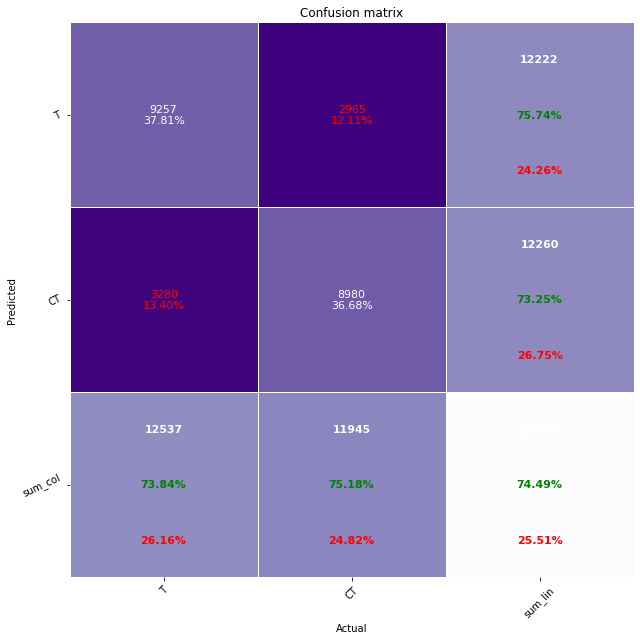





precision: [0.75740468 0.7324633 ]
recall: [0.73837441 0.75177899]
fscore: [0.74776849 0.74199546]
support: [12537 11945]
TPT: 0.738374411741246
TPCT: 0.7517789870238594



MAE: 0.25508536884241484
MSE: 0.25508536884241484
RMSE: 0.5050597675943065
R-Squared: -0.020938440800413183


In [20]:
model_function(LogisticRegression())

# SVM

SVC()
accuracy on train 0.7627134221060371
accuracy on test 0.7573319173270158

Predicted     0     1
Actual               
0          8852  3685
1          2256  9689

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     12537
           1       0.72      0.81      0.77     11945

    accuracy                           0.76     24482
   macro avg       0.76      0.76      0.76     24482
weighted avg       0.76      0.76      0.76     24482




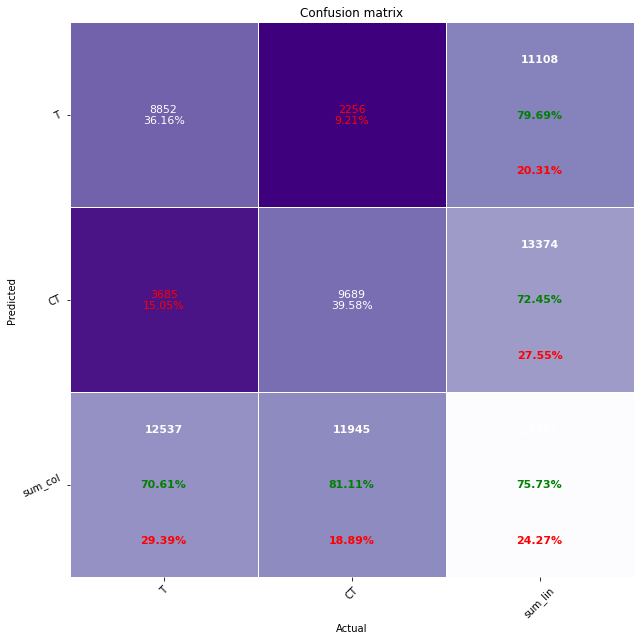





precision: [0.79690313 0.72446538]
recall: [0.70607003 0.81113437]
fscore: [0.74874181 0.76535408]
support: [12537 11945]
TPT: 0.7060700327031986
TPCT: 0.8111343658434491



MAE: 0.24266808267298423
MSE: 0.24266808267298423
RMSE: 0.49261352262497243
R-Squared: 0.028759763523578008


In [49]:
model_function(svm.SVC())

# Naive Bayes

MultinomialNB()
accuracy on train 0.7271566865452169
accuracy on test 0.7296789477983825

Predicted     0     1
Actual               
0          9380  3157
1          3461  8484

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     12537
           1       0.73      0.71      0.72     11945

    accuracy                           0.73     24482
   macro avg       0.73      0.73      0.73     24482
weighted avg       0.73      0.73      0.73     24482




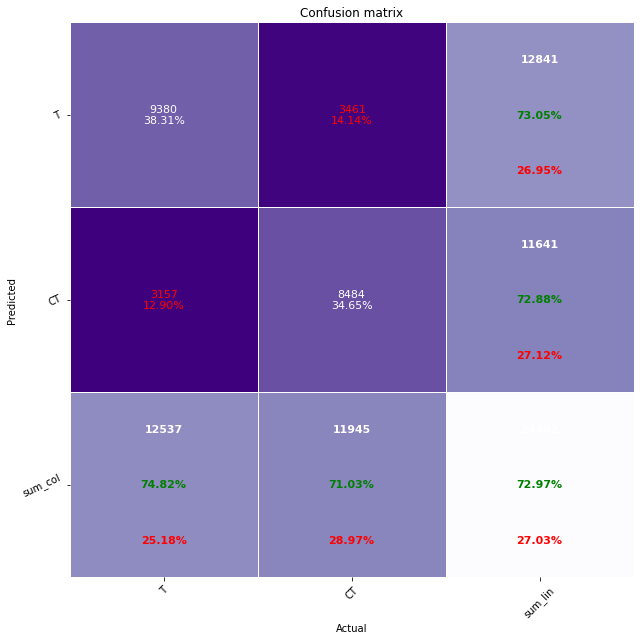





precision: [0.7304727  0.72880337]
recall: [0.74818537 0.71025534]
fscore: [0.73922295 0.71940982]
support: [12537 11945]
TPT: 0.7481853713009492
TPCT: 0.7102553369610716



MAE: 0.2703210522016175
MSE: 0.2703210522016175
RMSE: 0.5199240831136961
R-Squared: -0.08191682965846847


In [21]:
model_function(MultinomialNB())

# Neural Network

MLPClassifier(verbose=True)
Iteration 1, loss = 0.50832074
Iteration 2, loss = 0.47452414
Iteration 3, loss = 0.46845504
Iteration 4, loss = 0.46442358
Iteration 5, loss = 0.46085747
Iteration 6, loss = 0.45877670
Iteration 7, loss = 0.45675613
Iteration 8, loss = 0.45538987
Iteration 9, loss = 0.45397099
Iteration 10, loss = 0.45262922
Iteration 11, loss = 0.45173967
Iteration 12, loss = 0.45111327
Iteration 13, loss = 0.44969640
Iteration 14, loss = 0.44900272
Iteration 15, loss = 0.44836402
Iteration 16, loss = 0.44743473
Iteration 17, loss = 0.44694742
Iteration 18, loss = 0.44637593
Iteration 19, loss = 0.44596464
Iteration 20, loss = 0.44533615
Iteration 21, loss = 0.44468892
Iteration 22, loss = 0.44425127
Iteration 23, loss = 0.44376558
Iteration 24, loss = 0.44314747
Iteration 25, loss = 0.44256379
Iteration 26, loss = 0.44235059
Iteration 27, loss = 0.44174172
Iteration 28, loss = 0.44146091
Iteration 29, loss = 0.44117405
Iteration 30, loss = 0.44046542
Iteration 31, loss = 

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on train 0.7871293195000408
accuracy on test 0.7668899599705906

Predicted     0     1
Actual               
0          9223  3314
1          2393  9552

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     12537
           1       0.74      0.80      0.77     11945

    accuracy                           0.77     24482
   macro avg       0.77      0.77      0.77     24482
weighted avg       0.77      0.77      0.77     24482




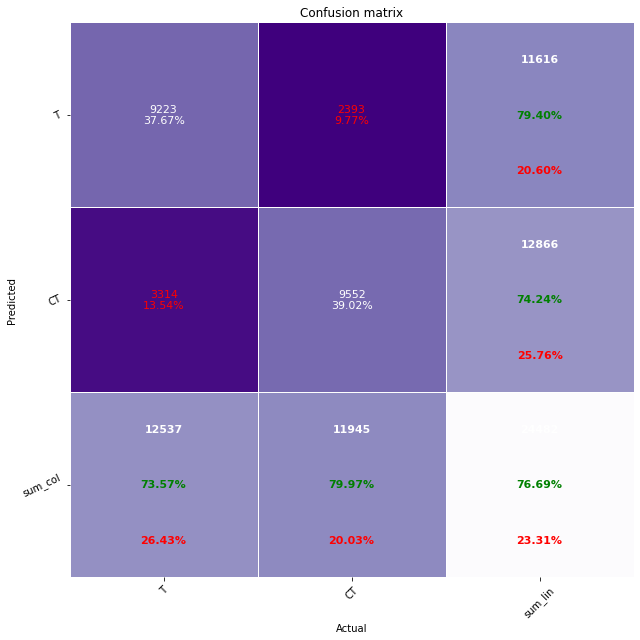





precision: [0.79399105 0.74242189]
recall: [0.73566244 0.79966513]
fscore: [0.76371465 0.76998106]
support: [12537 11945]
TPT: 0.7356624391800272
TPCT: 0.7996651318543324



MAE: 0.23311004002940935
MSE: 0.23311004002940935
RMSE: 0.48281470568884843
R-Squared: 0.06701430237822925


In [22]:
model_function(MLPClassifier(verbose = True))

# XGboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
accuracy on train 0.8315190752389511
accuracy on test 0.7931541540723797

Predicted     0     1
Actual               
0          9699  2838
1          2226  9719

              precision    recall  f1-score   support

           0       0.81      0.77      0.

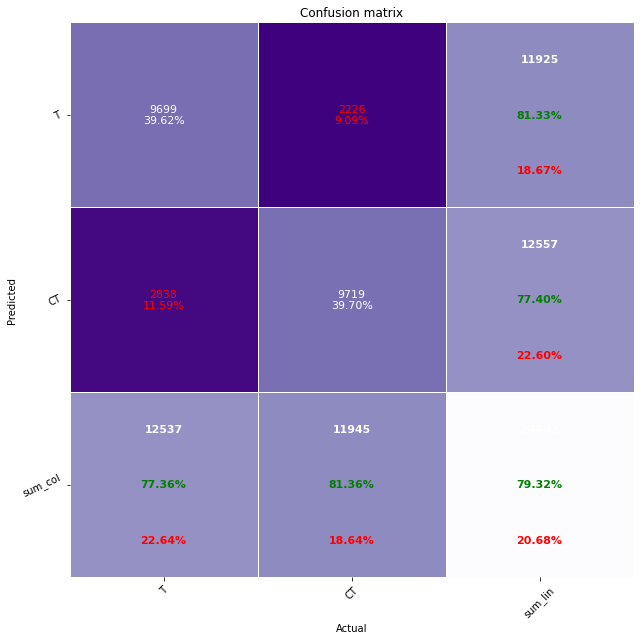





precision: [0.81333333 0.7739906 ]
recall: [0.77363006 0.81364588]
fscore: [0.79298504 0.79332299]
support: [12537 11945]
TPT: 0.7736300550370903
TPCT: 0.8136458769359565



MAE: 0.2068458459276203
MSE: 0.2068458459276203
RMSE: 0.4548030847824367
R-Squared: 0.17213254376088183


In [23]:
model_function(XGBClassifier())

# Adaboost

AdaBoostClassifier()
accuracy on train 0.7471509680581652
accuracy on test 0.7436075484029082

Predicted     0     1
Actual               
0          8801  3736
1          2541  9404

              precision    recall  f1-score   support

           0       0.78      0.70      0.74     12537
           1       0.72      0.79      0.75     11945

    accuracy                           0.74     24482
   macro avg       0.75      0.74      0.74     24482
weighted avg       0.75      0.74      0.74     24482




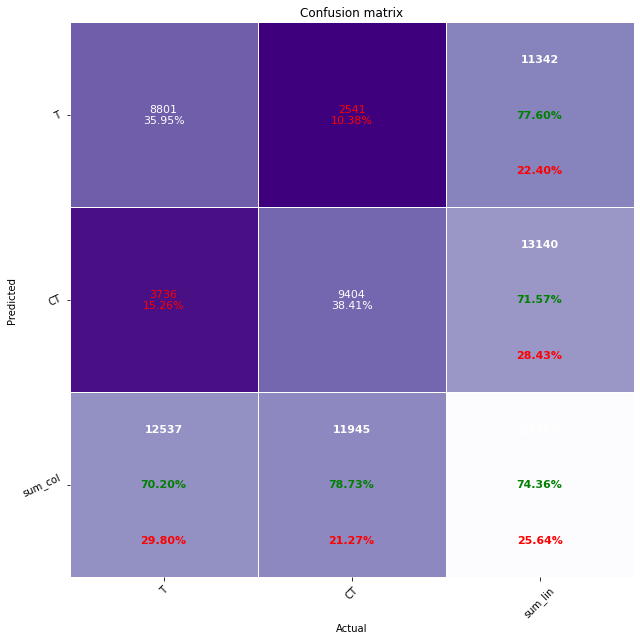





precision: [0.77596544 0.71567732]
recall: [0.70200207 0.78727501]
fscore: [0.73713305 0.74977078]
support: [12537 11945]
TPT: 0.7020020738613704
TPCT: 0.7872750104646296



MAE: 0.25639245159709173
MSE: 0.25639245159709173
RMSE: 0.5063521023922896
R-Squared: -0.026169830729254384


In [24]:
model_function(AdaBoostClassifier())

# Decision Tree

DecisionTreeClassifier()
accuracy on train 0.9965280614328895
accuracy on test 0.81786618740299

Predicted      0     1
Actual                
0          10292  2245
1           2214  9731

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12537
           1       0.81      0.81      0.81     11945

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482




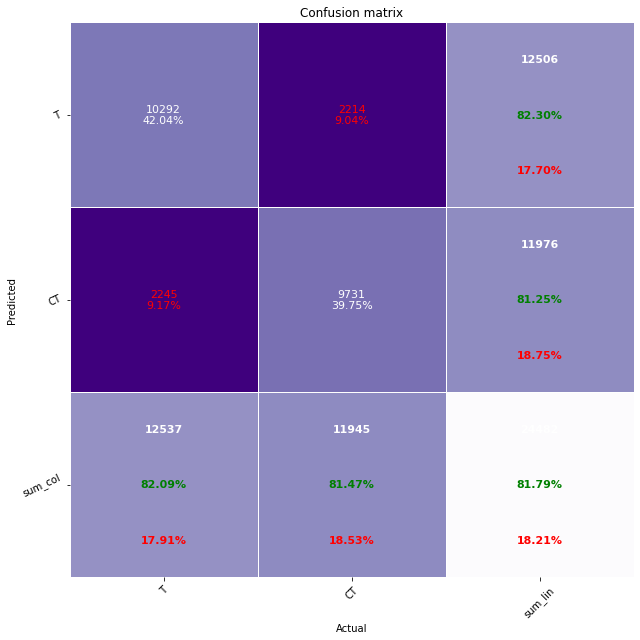





precision: [0.82296498 0.81254175]
recall: [0.82093005 0.81465048]
fscore: [0.82194625 0.81359475]
support: [12537 11945]
TPT: 0.8209300470607003
TPCT: 0.8146504813729594



MAE: 0.18213381259701006
MSE: 0.18213381259701006
RMSE: 0.4267713821204628
R-Squared: 0.27103850960303555


In [25]:
model_function(DecisionTreeClassifier())

# Random Forest

RandomForestClassifier()
accuracy on train 0.9965280614328895
accuracy on test 0.8637774691610163

Predicted      0      1
Actual                 
0          10794   1743
1           1592  10353

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     12537
           1       0.86      0.87      0.86     11945

    accuracy                           0.86     24482
   macro avg       0.86      0.86      0.86     24482
weighted avg       0.86      0.86      0.86     24482




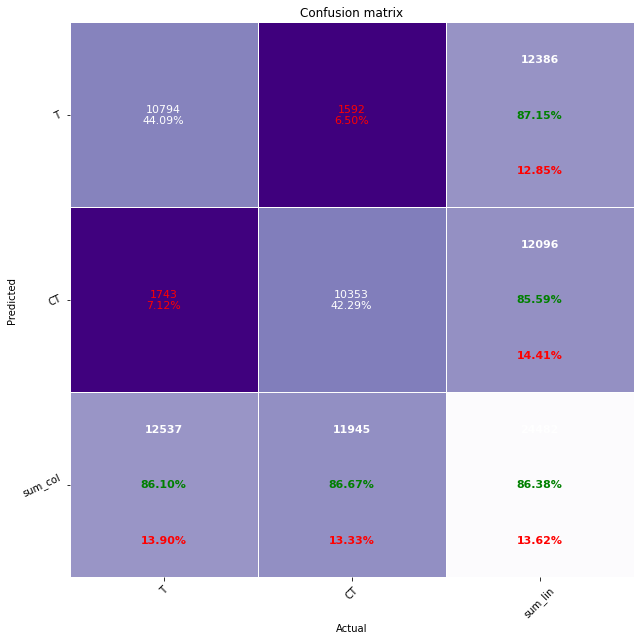





precision: [0.87146779 0.85590278]
recall: [0.86097152 0.86672248]
fscore: [0.86618786 0.86127865]
support: [12537 11945]
TPT: 0.8609715242881072
TPCT: 0.8667224780242779



MAE: 0.13622253083898375
MSE: 0.13622253083898375
RMSE: 0.36908336570344613
R-Squared: 0.45479108085358233


In [26]:
model_function(RandomForestClassifier())

# Hyper Parameter

In [27]:
def fit(mlp, param_grid,  x, y):
    
    model = model_selection.RandomizedSearchCV(
                estimator = mlp,
                param_distributions = param_grid,
                scoring = 'accuracy',
                verbose = 10,
                n_jobs = -1,
                cv = 5)
                
    model.fit(x, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()  
    for param_name in sorted(param_grid.keys()):  
        print(f"\t{param_name}: {best_parameters[param_name]}")

###### Neural Network

In [28]:
mlp = MLPClassifier(max_iter=100)

In [29]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [30]:
fit(mlp, parameter_space, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.7747017153468423
Best parameters set:
	activation: relu
	alpha: 0.0001
	hidden_layer_sizes: (50, 100, 50)
	learning_rate: constant
	solver: adam


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
params = {
    'solver' : 'adam',
    'activation' : 'relu',
    'alpha' : 0.0001,
    'hidden_layer_sizes' : (50, 100, 50),
    'learning_rate' : 'constant',
    'verbose' : True,
}

MLPClassifier(hidden_layer_sizes=(50, 100, 50), verbose=True)
Iteration 1, loss = 0.48805562
Iteration 2, loss = 0.46123449
Iteration 3, loss = 0.45554537
Iteration 4, loss = 0.45223958
Iteration 5, loss = 0.45011449
Iteration 6, loss = 0.44736035
Iteration 7, loss = 0.44647779
Iteration 8, loss = 0.44450426
Iteration 9, loss = 0.44274827
Iteration 10, loss = 0.44166828
Iteration 11, loss = 0.44018518
Iteration 12, loss = 0.43903766
Iteration 13, loss = 0.43877951
Iteration 14, loss = 0.43740487
Iteration 15, loss = 0.43631503
Iteration 16, loss = 0.43451381
Iteration 17, loss = 0.43352322
Iteration 18, loss = 0.43259874
Iteration 19, loss = 0.43230771
Iteration 20, loss = 0.43095238
Iteration 21, loss = 0.42995863
Iteration 22, loss = 0.42925413
Iteration 23, loss = 0.42922067
Iteration 24, loss = 0.42702151
Iteration 25, loss = 0.42618816
Iteration 26, loss = 0.42538837
Iteration 27, loss = 0.42495478
Iteration 28, loss = 0.42392129
Iteration 29, loss = 0.42303122
Iteration 30, loss 

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on train 0.8434870517114614
accuracy on test 0.7776733926966751

Predicted     0     1
Actual               
0          9270  3267
1          2176  9769

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     12537
           1       0.75      0.82      0.78     11945

    accuracy                           0.78     24482
   macro avg       0.78      0.78      0.78     24482
weighted avg       0.78      0.78      0.78     24482




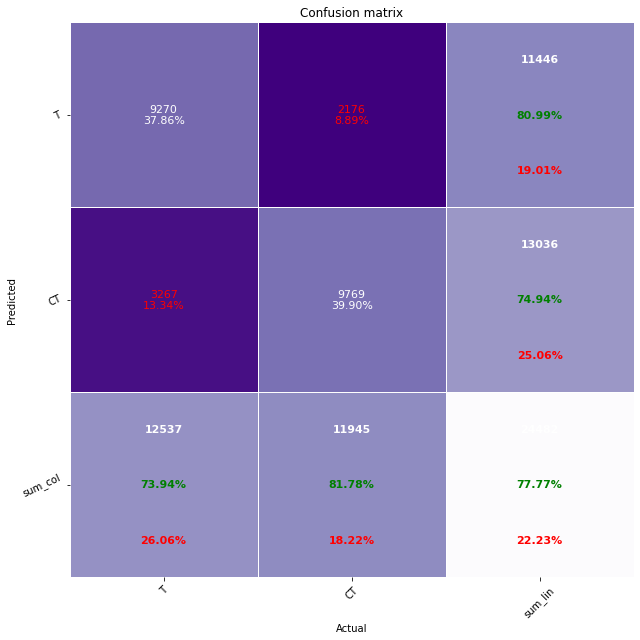





precision: [0.80988992 0.74938631]
recall: [0.73941134 0.81783173]
fscore: [0.77304758 0.78211441]
support: [12537 11945]
TPT: 0.7394113424264178
TPCT: 0.817831728756802



MAE: 0.2223266073033249
MSE: 0.2223266073033249
RMSE: 0.4715152248902732
R-Squared: 0.110173269291169


In [33]:
model_function(MLPClassifier(**params))

###### Random Forest

In [34]:
rf = RandomForestClassifier()

In [35]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [36]:
fit(rf, param_grid, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.8268421111493491
Best parameters set:
	bootstrap: True
	max_depth: 80
	max_features: 3
	min_samples_leaf: 3
	min_samples_split: 10
	n_estimators: 1000


In [45]:
best_params_rf = {
    'bootstrap': True,
    'max_depth': 80,
    'max_features': 3,
    'min_samples_leaf': 3,
    'min_samples_split': 10,
    'n_estimators': 1000,
    'verbose' : True
}

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=1000, verbose=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy on train 0.9395065762601095
accuracy on test 0.835062494894208

Predicted      0      1
Actual                 
0          10266   2271
1           1767  10178

              precision    recall  f1-score   support

           0       0.85      0.82      0.84     12537
           1       0.82      0.85      0.83     11945

    accuracy                           0.84     24482
   macro avg       0.84      0.84      0.84     24482
weighted avg       0.84      0.84      0.84     24482




[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.9s finished


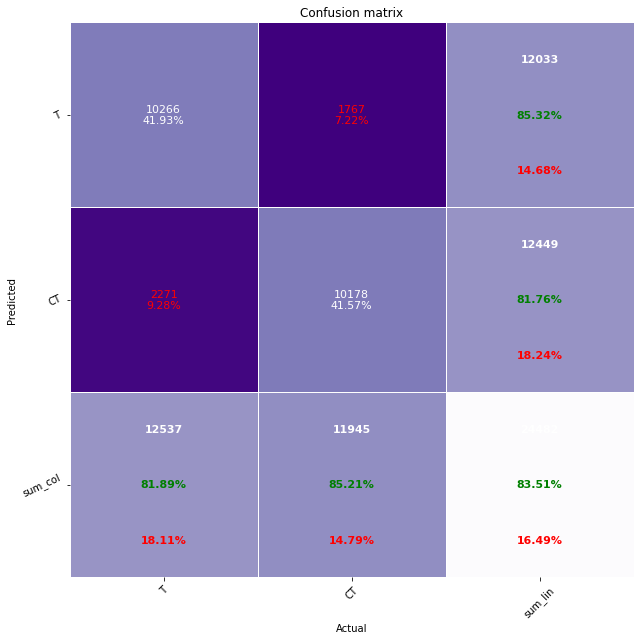





precision: [0.85315383 0.81757571]
recall: [0.81885619 0.852072  ]
fscore: [0.83565324 0.83446749]
support: [12537 11945]
TPT: 0.8188561856903566
TPCT: 0.8520719966513185



MAE: 0.164937505105792
MSE: 0.164937505105792
RMSE: 0.40612498704929745
R-Squared: 0.3398639833543524


In [46]:
model_function(RandomForestClassifier(**best_params_rf))

###### XGboost

In [37]:
xgb = XGBClassifier()

In [38]:
param_grid_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [39]:
fit(xgb, param_grid_xgb, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.780205841203961
Best parameters set:
	learning_rate: 0.05
	max_depth: 7
	n_estimators: 180


In [47]:
best_params_xgb = {
    'learning_rate': 0.05,
    'max_depth': 7,
    'n_estimators': 180,
    'verbose' : True
}

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
[13:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly 

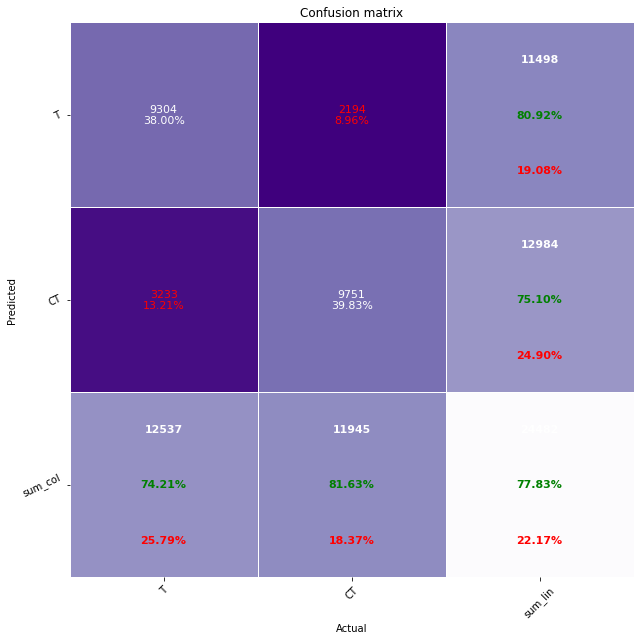





precision: [0.80918421 0.75100123]
recall: [0.74212331 0.81632482]
fscore: [0.77420429 0.78230174]
support: [12537 11945]
TPT: 0.7421233149876366
TPCT: 0.8163248221012976



MAE: 0.22167306592598643
MSE: 0.22167306592598643
RMSE: 0.4708216922848675
R-Squared: 0.1127889642555896


In [48]:
model_function(XGBClassifier(**best_params_xgb))

###### PCA

In [40]:
pca = PCA(n_components = 24).fit(X)

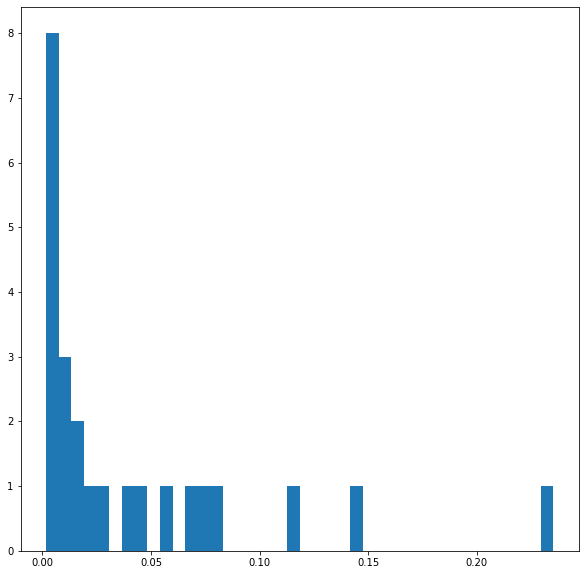

In [41]:
plt.figure(figsize = (10,10))
plt.hist(pca.explained_variance_ratio_, bins = 40)
plt.show()

In [42]:
def KComponents(pca, alpha):
    total_variance = 0
    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if total_variance >= (1-alpha):
            return feature+1
        
    return len(pca.explained_variance_ratio_)

In [43]:
k = KComponents(pca, 0.05)
print(k)

15
